# DS 3000 - Assignment 3

**Student Name**: Shreyas Shukla

**Date**: 21 Sep 2024


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Data Science Problem (50 pts)
### Instructions

You are hired as a Data Scientist for the NYC Taxi and Limousine Commission (TLC) and this company routinely collects trip data from all licensed cabs in NY. Your team would like to use this data in the future to understand how New Yorkers use these taxis. Your first assignment is to **analyze the data of the Green Taxis, and determine if its a viable source.**

Your supervisor has requested that you perform your analysis using data from February 2023 and would like for you to present your findings during the next team meeting. Use a Jupyter notebook to explain your data wrangling and analytical steps to your colleagues. 

**Data & Documentation**

- **Data Source:** https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet
- **Data Dictionary:** [Green Trips Data Dictionary](https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_green.pdf).

The TLC trip record data and a description of the initiative can be found at the following link: https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page

**`Note:`** Ensure that you explain the results from each question.


**In this assignment you will use the Pandas library. Pandas allows us to load data that's stored in a various formats, e.g. excel, csv, txt, parquet, etc. In this assignment, you will learn to read data in parquet format which is one of the preferred formats when working with `Big Data`. [Click here to learn more about parquet files](https://towardsdatascience.com/csv-files-for-storage-no-thanks-theres-a-better-option-72c78a414d1d)**

I also provided starter code below to help you to read the data in parquet format. First, you'll need to install a new library called *fastparquet*.

In [6]:
#run this cell to install the fast parquet library
%pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


## 1. Load the data
Load the NYC Green Taxi Trip Records data directly from the URL into a data frame called tripdata_df. 

In [18]:
import pandas as pd
import numpy as np
np.float_ = np.float64


tripdata_df = pd.read_parquet(path = 'https://d37ci6vzurychx.cloudfront.net/trip-data/green_tripdata_2023-02.parquet', #provide the URL to the data source
                      engine = 'fastparquet')

tripdata_df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,1.0,2023-02-01 00:46:22,2023-02-01 01:05:57,N,1.0,74.0,265.0,1.0,10.80,42.9,1.0,1.5,0.00,0.0,NaN,1.0,45.40,2.0,1.0,0.00
1,2.0,2023-02-01 00:05:09,2023-02-01 00:22:42,N,1.0,216.0,196.0,1.0,4.76,23.3,1.0,0.5,0.00,0.0,NaN,1.0,25.80,2.0,1.0,0.00
2,2.0,2023-02-01 00:03:47,2023-02-01 00:27:30,N,1.0,7.0,114.0,1.0,6.32,30.3,1.0,0.5,8.89,0.0,NaN,1.0,44.44,1.0,1.0,2.75
3,2.0,2023-01-31 23:30:56,2023-01-31 23:51:40,N,1.0,74.0,239.0,1.0,3.50,16.3,1.0,0.5,0.00,0.0,NaN,1.0,21.55,2.0,1.0,2.75
4,2.0,2023-02-01 00:15:05,2023-02-01 00:26:02,N,1.0,82.0,223.0,1.0,3.14,17.0,1.0,0.5,0.00,0.0,NaN,1.0,19.50,2.0,1.0,0.00


## 2. Inspect the Data (5 pts) 
Inspect the data and perform the following: 
1. display the dimensions, and indicate if the variables have suitable types.
2. convert all variables to suitable types

In [19]:
tripdata_df.info()

# Converting to categorical data type 
tripdata_df['VendorID'] = tripdata_df['VendorID'].astype('category')
tripdata_df['RatecodeID'] = tripdata_df['RatecodeID'].astype('category')
tripdata_df['payment_type'] = tripdata_df['payment_type'].astype('category')
tripdata_df['trip_type'] = tripdata_df['trip_type'].astype('category')


tripdata_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64809 entries, 0 to 64808
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               64809 non-null  float64       
 1   lpep_pickup_datetime   64809 non-null  datetime64[us]
 2   lpep_dropoff_datetime  64809 non-null  datetime64[us]
 3   store_and_fwd_flag     59988 non-null  object        
 4   RatecodeID             59988 non-null  float64       
 5   PULocationID           64809 non-null  float64       
 6   DOLocationID           64809 non-null  float64       
 7   passenger_count        59988 non-null  float64       
 8   trip_distance          64809 non-null  float64       
 9   fare_amount            64809 non-null  float64       
 10  extra                  64809 non-null  float64       
 11  mta_tax                64809 non-null  float64       
 12  tip_amount             64809 non-null  float64       
 13  t

VendorID                       category
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                     category
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                   category
trip_type                      category
congestion_surcharge            float64
dtype: object

## 3. Types of Data (2 pts) 
Are there any categorical data in this dataset. If they exist, demonstrate at least two categorical variables and indicate if they are nominal or ordinal (hint: read the data dictionary above which describes all fields in the data)

In [27]:
# Checking for categorical variables
print(tripdata_df.dtypes)

# Extract columns with 'category' or 'object' type
categorical_columns = tripdata_df.select_dtypes(include=['category', 'object']).columns
print("\nCategorical columns in the dataset:")
print(categorical_columns)


# 1. 'VendorID' - Nominal (categories without an order)
print("\nVendorID unique values:")
print(tripdata_df['VendorID'].unique())
print("Explanation: 'VendorID' is a nominal variable because it represents distinct categories (vendors) with no inherent order.")

# 2. 'payment_type' - Ordinal (categories with a meaningful order)
print("\npayment_type unique values:")
print(tripdata_df['payment_type'].unique())
print("Explanation: 'payment_type' is an ordinal variable because it represents different methods of payment that have a meaningful order (e.g., cash, credit).")


VendorID                       category
lpep_pickup_datetime     datetime64[us]
lpep_dropoff_datetime    datetime64[us]
store_and_fwd_flag               object
RatecodeID                     category
PULocationID                    float64
DOLocationID                    float64
passenger_count                 float64
trip_distance                   float64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
ehail_fee                       float64
improvement_surcharge           float64
total_amount                    float64
payment_type                   category
trip_type                      category
congestion_surcharge            float64
dtype: object

Categorical columns in the dataset:
Index(['VendorID', 'store_and_fwd_flag', 'RatecodeID', 'payment_type',
       'trip_type'],
      dtype='object')

VendorID unique values:
[1.0, 2.0]

## QUESTION 3 : 

VendorID:

Description: This field represents the ID of the vendor.
Type: Nominal. It’s a category representing different vendors, but there’s no inherent order between them.

payment_type:

Description: This field represents the payment method used for the trip.
Type: Ordinal. This is an ordinal variable because the payment types have a meaningful order (e.g., cash, credit card, etc.), where some might be preferred over others depending on the context.

## 4. Missing Values (10 pts) 
Evaluate the frequency of missing values in the dataset and perform the following:
1. explain if missing values are an isolated case or a widespread issue? 
2. what method would you recommend to handle missing data?
3. write the suitable code to handle the missing values.

In [15]:
missing_values = tripdata_df.isnull().sum()
missing_percentage = (missing_values / len(tripdata_df)) * 100
print(missing_percentage[missing_percentage > 0])

store_and_fwd_flag        7.438782
RatecodeID                7.438782
passenger_count           7.438782
ehail_fee               100.000000
payment_type              7.438782
trip_type                 7.446497
congestion_surcharge      7.438782
dtype: float64


## QUESTION 4 : 
There are missing values in several columns (store_and_fwd_flag, RatecodeID, passenger_count, payment_type, trip_type, congestion_surcharge), all missing in about 7.43% of the rows, suggesting that missing values are not isolated but rather a moderate issue across multiple fields.The column ehail_fee has 100% missing values, indicating that this column may be irrelevant for the analysis, as it contains no data

## 5. Invalid Data (10 pts) 
Explore the data to determine if there are any invalid values and perform the following: 
1. demonstrate at least three issues that you found. **`NOTE`: The issues that you found should not include any aspects from the previous questions.**
2. write suitable code to handle the invalid data that you found.

Negative or zero trip distances:

A trip distance of 0 or less is likely invalid unless it’s a rare case (like a very short ride or entry error).

Negative or zero fare amounts:

Fares should be positive for all completed trips, so any negative or zero fare values may indicate invalid data.

Unrealistic passenger counts:

A passenger_count of 0 for non-shared rides could be invalid, and very high values (e.g., more than 6) might indicate an error, as taxis usually accommodate a limited number of passengers.

In [20]:
# 1. Remove rows with non-positive trip distances (<= 0)
print("Filtering out invalid trip distances (<= 0)...")
invalid_trip_distance = tripdata_df[tripdata_df['trip_distance'] <= 0]
print(f"Found {len(invalid_trip_distance)} rows with invalid trip distances.")
tripdata_df = tripdata_df[tripdata_df['trip_distance'] > 0]

# 2. Remove rows with non-positive fare amounts (<= 0)
print("\nFiltering out invalid fare amounts (<= 0)...")
invalid_fare_amount = tripdata_df[tripdata_df['fare_amount'] <= 0]
print(f"Found {len(invalid_fare_amount)} rows with invalid fare amounts.")
tripdata_df = tripdata_df[tripdata_df['fare_amount'] > 0]

# 3. Remove rows with unrealistic passenger counts (<= 0 or > 6)
print("\nFiltering out invalid passenger counts (<= 0 or > 6)...")
invalid_passenger_count = tripdata_df[(tripdata_df['passenger_count'] <= 0) | (tripdata_df['passenger_count'] > 6)]
print(f"Found {len(invalid_passenger_count)} rows with invalid passenger counts.")
tripdata_df = tripdata_df[(tripdata_df['passenger_count'] > 0) & (tripdata_df['passenger_count'] <= 6)]

# Final dataset overview after cleaning
print("\nDataset summary after cleaning:")
tripdata_df.info()


Filtering out invalid trip distances (<= 0)...
Found 2857 rows with invalid trip distances.

Filtering out invalid fare amounts (<= 0)...
Found 163 rows with invalid fare amounts.

Filtering out invalid passenger counts (<= 0 or > 6)...
Found 343 rows with invalid passenger counts.

Dataset summary after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 56780 entries, 0 to 59987
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               56780 non-null  category      
 1   lpep_pickup_datetime   56780 non-null  datetime64[us]
 2   lpep_dropoff_datetime  56780 non-null  datetime64[us]
 3   store_and_fwd_flag     56780 non-null  object        
 4   RatecodeID             56780 non-null  category      
 5   PULocationID           56780 non-null  float64       
 6   DOLocationID           56780 non-null  float64       
 7   passenger_count        56780 non-null  float

<span style='color:red'>**Answer the following questions using the prepared data.**</span>

## 6. Data Visualization (10 pts) 
Create bar charts that show: 
1. the most common way that New Yorkers request/hail a cab. 
2. the most common pick-up locations (display the top 5 locations). 
3. the most common drop-off locations (display the top 5 locations). 

Explain each chart.

<Axes: title={'center': 'Most Common Ways to Hail a Cab'}, xlabel='trip_type'>

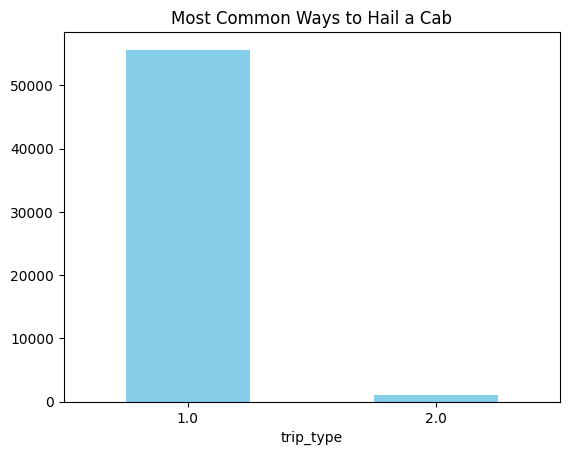

In [22]:
# The most common way that New Yorkers request/hail a cab. 
trip_type_counts = tripdata_df['trip_type'].value_counts()


trip_type_counts.plot(kind='bar', title='Most Common Ways to Hail a Cab', rot=0, color='skyblue')


This bar chart shows the number of trips categorized by how they were hailed, either via Street-Hail or Dispatch. The chart highlights which method is more commonly used by New Yorkers to hail taxis, providing insight into rider preferences.

<Axes: title={'center': 'Top 5 Pick-up Locations'}, xlabel='PULocationID'>

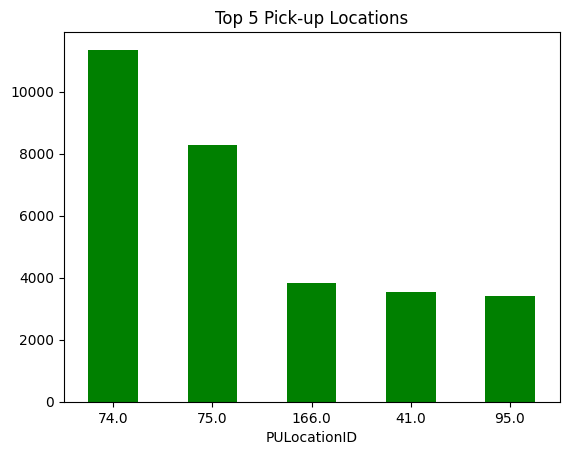

In [21]:
# The most common pick-up locations (display the top 5 locations). 
pickup_counts = tripdata_df['PULocationID'].value_counts().head(5)


pickup_counts.plot(kind='bar', title='Top 5 Pick-up Locations', rot=0, color='green')


This bar chart displays the top 5 most frequent pick-up locations by their PULocationID. It helps us understand the most popular areas where taxis are being hailed, which can be useful for taxi routing and fleet management.

<Axes: title={'center': 'Top 5 Drop-off Locations'}, xlabel='DOLocationID'>

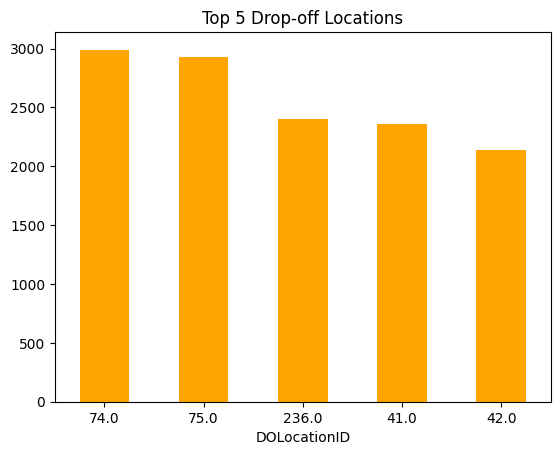

In [23]:
# The most common drop-off locations (display the top 5 locations). 
dropoff_counts = tripdata_df['DOLocationID'].value_counts().head(5)

dropoff_counts.plot(kind='bar', title='Top 5 Drop-off Locations', rot=0, color='orange')


This bar chart shows the top 5 most frequent drop-off locations by their DOLocationID.
Understanding drop-off locations can help in determining the most common destinations for taxi trips, allowing the TLC to optimize services and infrastructure.

## 7. Data Analysis (10 pts)
Write suitable code to answer the following:
1. On average, how far do New Yorkers usually travel using these taxis?
2. What is the most expensive and least expensive trip? 
3. What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

Explain the results.

*`TIP`: If the answers from your analysis in this question contains erroneous or invalid numeric values, this means that the data needs to be cleaned to ensure that the analytical results are coherent.*

In [25]:
# On average, how far do New Yorkers usually travel using these taxis?
avg = tripdata_df['trip_distance'].mean()

print(f"On average, New Yorkers travel {avg:.2f} miles using green taxis.")


On average, New Yorkers travel 2.83 miles using green taxis.


In [26]:
# What is the most expensive and least expensive trip? 
most_expensive_trip = tripdata_df['total_amount'].max()
least_expensive_trip = tripdata_df['total_amount'].min()

print(f"The most expensive trip cost ${most_expensive_trip:.2f}.")
print(f"The least expensive trip cost ${least_expensive_trip:.2f}.")


The most expensive trip cost $322.35.
The least expensive trip cost $1.01.


In [26]:
#What is the minimum, average and maximum **tip amount** for all trips that are 1) under 2 miles and 2) over 2 miles (i.e. >= 2)? 

# Trips under 2 miles
under_2_miles = tripdata_df[tripdata_df['trip_distance'] < 2]
under_2_miles_tip_stats = under_2_miles['tip_amount'].agg(['min', 'mean', 'max'])

# Trips 2 miles and over
over_2_miles = tripdata_df[tripdata_df['trip_distance'] >= 2]
over_2_miles_tip_stats = over_2_miles['tip_amount'].agg(['min', 'mean', 'max'])


print("Tip amount statistics for trips under 2 miles:")
print(f"Minimum tip: ${under_2_miles_tip_stats['min']:.2f}")
print(f"Average tip: ${under_2_miles_tip_stats['mean']:.2f}")
print(f"Maximum tip: ${under_2_miles_tip_stats['max']:.2f}\n")

print("Tip amount statistics for trips 2 miles and over:")
print(f"Minimum tip: ${over_2_miles_tip_stats['min']:.2f}")
print(f"Average tip: ${over_2_miles_tip_stats['mean']:.2f}")
print(f"Maximum tip: ${over_2_miles_tip_stats['max']:.2f}")


Tip amount statistics for trips under 2 miles:
Minimum tip: $0.00
Average tip: $1.37
Maximum tip: $80.00

Tip amount statistics for trips 2 miles and over:
Minimum tip: $0.00
Average tip: $3.00
Maximum tip: $75.82



The data analysis reveals several key insights into the behavior of New Yorkers using green taxis. On average, passengers travel 2.83 miles, indicating that most trips fall within a short to medium distance range. The most expensive trip recorded cost $322.35, which likely represents a longer ride, possibly including tolls or extra charges, while the least expensive trip cost only $1.01, suggesting either a very short ride or minimal charges.

When it comes to tipping, for trips under 2 miles, the average tip was $1.37, with tips ranging from $0.00 (no tip) to a maximum of $80.00. This suggests that while many riders don’t tip on short trips, a few may leave unusually high tips. For trips of 2 miles or more, the average tip increases to $3.00, with a maximum tip of $75.82, reflecting a tendency for larger tips on longer trips. These patterns highlight that tipping behavior is generally modest but varies significantly depending on trip distance.

## 8. Findings (3 pts)
Based on the preliminary analysis, is this data a viable source that can be used by your team in the future to understand how New Yorkers use these taxis? Justify your response.

 This dataset appears to be a viable source for understanding how New Yorkers use green taxis. The data provides valuable insights into key aspects such as trip distances, fare amounts, tipping behavior, and popular pick-up/drop-off locations. Despite some missing values and the need for data cleaning (e.g., handling invalid trip distances and fare amounts), the overall dataset is comprehensive and covers a large volume of trips.

By addressing any inconsistencies and properly cleaning the data, it can be effectively used for further analysis to inform decisions about fleet management, pricing strategies, and customer behavior trends. The insights gained from this dataset will allow the TLC to better understand taxi usage patterns and improve services for both riders and drivers.